In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
# Import data
data=pd.read_csv("USA_cars_datasets.csv")

#Check what columns we have to decide wht we will use
pd.set_option("display.max.columns", None)
data.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [2]:
#Copy original dataset to work with copy and don't change initial data
data_new = data.copy()
#drop columns I will not use in my exploration
data_new.drop(["Unnamed: 0",'vin', 'lot', "country",  "condition"], axis=1, inplace= True)
#delite all zerows values
data_new=data_new[~(data_new == 0).any(axis=1)]
#check what columns left
data_new.head(5)

,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida


In [3]:
#check data for NaN values (missind values)
nan_data=data_new[data_new.isna().any(axis=1)]
nan_data.head()

,price,brand,model,year,title_status,mileage,color,state


In [4]:
#Use one more method to find the missing values. 
#Show the total null values for each column and sort it in descending order
data.isnull().sum().sort_values(ascending=False)[:10]

condition       0
country         0
state           0
lot             0
vin             0
color           0
mileage         0
title_status    0
year            0
model           0
dtype: int64

In [5]:
#data doesn't have missing values
# check types of features I will work with
data_new.dtypes

price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
state            object
dtype: object

In [6]:
#convert float type into int
data_new["mileage"]=data_new["mileage"].astype("int")
data_new.dtypes

price            int64
brand           object
model           object
year             int64
title_status    object
mileage          int32
color           object
state           object
dtype: object

In [7]:
data_new

,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey
1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida
...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609,red,california
2495,9200,nissan,versa,2018,clean vehicle,34553,silver,florida
2496,9200,nissan,versa,2018,clean vehicle,31594,silver,florida
2497,9200,nissan,versa,2018,clean vehicle,32557,black,florida


In [8]:
#find correlation between all values
from scipy.stats import chisquare
data_new.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,price,brand,model,year,title_status,mileage,color,state
price,1.000000,0.030455,0.075578,0.060142,0.022983,0.326808,0.175227,0.089379
brand,0.030455,1.000000,0.400267,-0.159801,0.043509,0.325540,-0.007906,-0.082876
model,0.075578,0.400267,1.000000,0.059064,-0.161816,0.429020,-0.117732,-0.005795
year,0.060142,-0.159801,0.059064,1.000000,0.061113,0.013008,-0.025228,0.092397
title_status,0.022983,0.043509,-0.161816,0.061113,1.000000,-0.005014,0.037479,0.035655
mileage,0.326808,0.325540,0.429020,0.013008,-0.005014,1.000000,0.078900,0.077720
color,0.175227,-0.007906,-0.117732,-0.025228,0.037479,0.078900,1.000000,-0.025052
state,0.089379,-0.082876,-0.005795,0.092397,0.035655,0.077720,-0.025052,1.000000


In [9]:
# I checked all brand column for unique values 
unique_list = list(data_new['brand'].unique())
unique_list

['toyota',
 'ford',
 'dodge',
 'chevrolet',
 'gmc',
 'chrysler',
 'kia',
 'buick',
 'infiniti',
 'mercedes-benz',
 'jeep',
 'bmw',
 'cadillac',
 'hyundai',
 'heartland',
 'jaguar',
 'acura',
 'honda',
 'harley-davidson',
 'audi',
 'lincoln',
 'lexus',
 'nissan',
 'land',
 'maserati',
 'peterbilt',
 'ram',
 'mazda']

In [10]:
# I checked all color column for unique values 
unique_list = list(data_new['color'].unique())
unique_list

['black',
 'silver',
 'blue',
 'red',
 'white',
 'gray',
 'orange',
 'brown',
 'no_color',
 'gold',
 'charcoal',
 'turquoise',
 'beige',
 'green',
 'dark blue',
 'phantom black',
 'yellow',
 'color:',
 'toreador red',
 'bright white clearcoat',
 'billet silver metallic clearcoat',
 'black clearcoat',
 'jazz blue pearlcoat',
 'purple',
 'ruby red metallic tinted clearcoat',
 'triple yellow tri-coat',
 'competition orange',
 'off-white',
 'shadow black',
 'magnetic metallic',
 'ingot silver metallic',
 'ruby red',
 'royal crimson metallic tinted clearcoat',
 'kona blue metallic',
 'oxford white',
 'lightning blue',
 'ingot silver',
 'white platinum tri-coat metallic',
 'guard',
 'tuxedo black metallic',
 'tan',
 'burgundy',
 'super black',
 'cayenne red',
 'morningsky blue',
 'pearl white',
 'glacier white']

In [11]:
# change all unique values into category type
data_new['brand'] = data_new["brand"].astype('category')
# I decided to leave colorsas they are and don't combine them into similar because they may differ despite similar names  
data_new['color'] = data_new["color"].astype('category')
data_new.dtypes

price              int64
brand           category
model             object
year               int64
title_status      object
mileage            int32
color           category
state             object
dtype: object

In [12]:
# add 2 columns to visualize numerical values for color and brand
data_new["brand category"]=data_new["brand"].cat.codes
data_new["color category"]=data_new["color"].cat.codes
data_new.head()

,price,brand,model,year,title_status,mileage,color,state,brand category,color category
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,27,2
1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee,8,37
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,7,37
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,8,4
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,5,32


In [13]:
data_new.title_status.unique()

array(['clean vehicle', 'salvage insurance'], dtype=object)

In [14]:
data_new["title_status"] = data_new["title_status"].astype('category')
data_new["title_category"]=data_new["title_status"].cat.codes

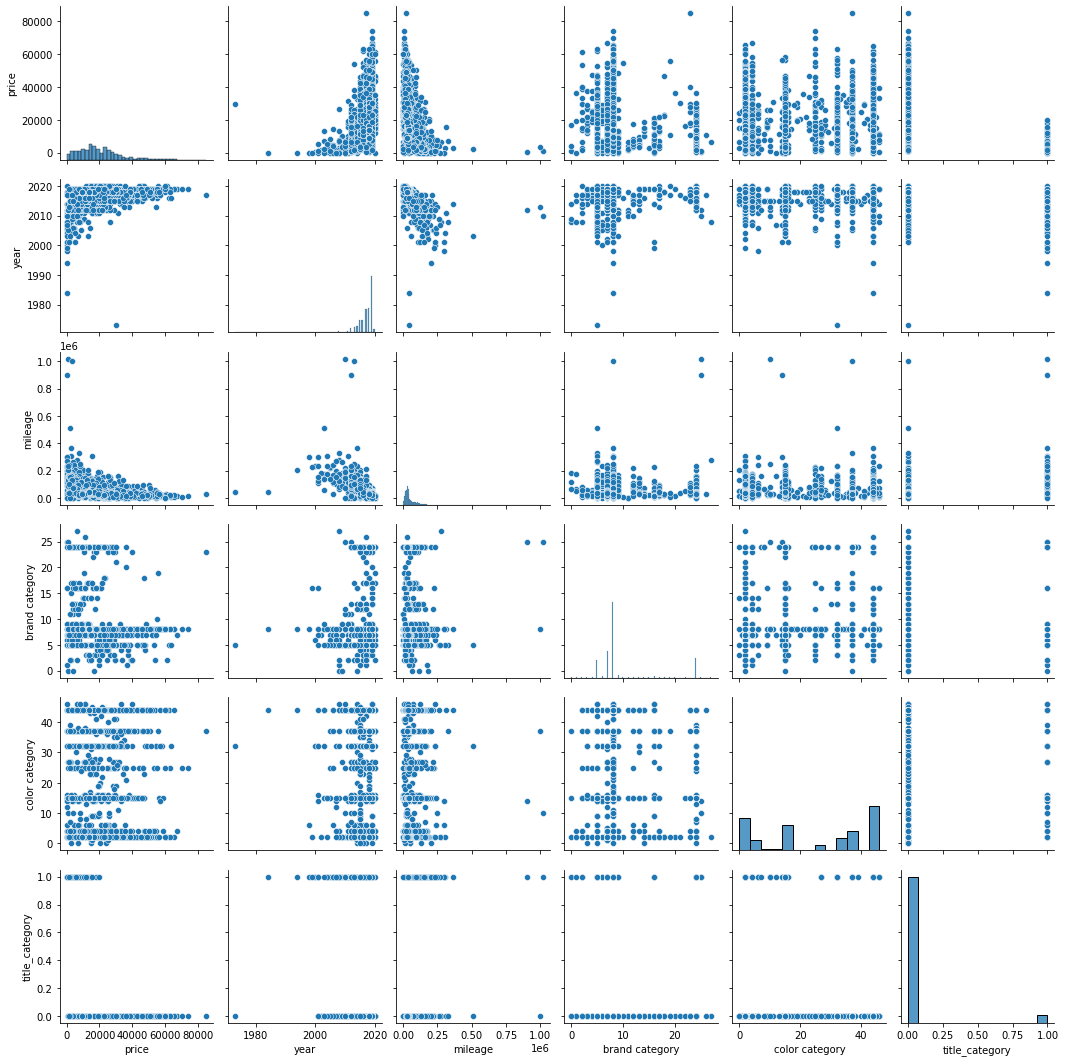

In [15]:
#plot all dependency between numeric variables
sns.pairplot(data_new)

In [16]:
# filtered brands what cost more from other category
df=data_new[data_new["brand category"]<10]
df.brand.unique()

['ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'buick', 'bmw', 'cadillac', 'acura', 'audi']
Categories (10, object): ['ford', 'dodge', 'chevrolet', 'gmc', ..., 'bmw', 'cadillac', 'acura', 'audi']

In [17]:
# will use all features to make prediction
test=data_new.drop(["brand", "color", "model", "title_status", "state"], axis=1)
X = test.drop(["price"], axis=1)

# data thet will be predicted
Y = test['price']
test.head()

,price,year,mileage,brand category,color category,title_category
0,6300,2008,274117,27,2,0
1,2899,2011,190552,8,37,0
2,5350,2018,39590,7,37,0
3,25000,2014,64146,8,4,0
4,27700,2018,6654,5,32,0


In [18]:
#will use 20% by 80% size for training model
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.20, random_state=1)

In [19]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train['year'].values.reshape(-1,1), y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test['year'].values.reshape(-1,1))

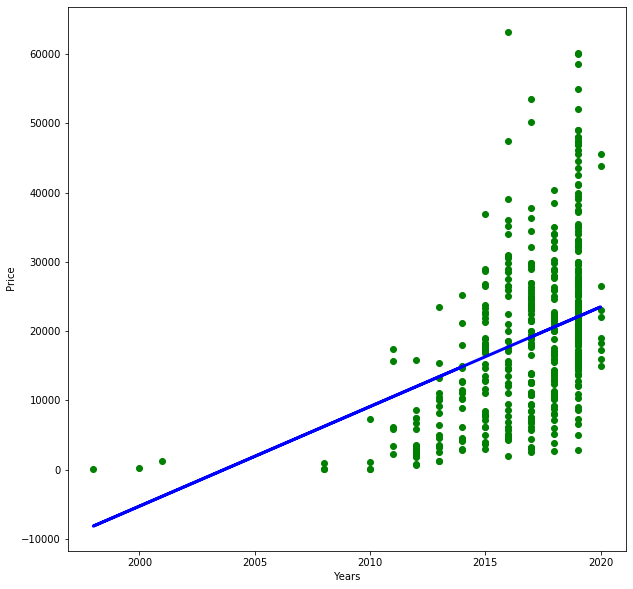

In [21]:

# Your input goes here
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))

# label axes 
plt.xlabel(" Years ") 
plt.ylabel(" Price ")

# Scatter plot actual test set values in Black
plt.scatter(x_test["year"], y_test, color ='green')

# line plot for predictions 
plt.plot(x_test["year"],  y_pred, color = "blue", linewidth = 3)

# plotting the graph


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


Coefficients: [1438.59229633]
Intercept: -2882468.74610148
Mean squared error (MSE): 109961652.44
Coefficient of determination (R^2): 0.21


In [23]:
#Fit a model using a single mileage feature
model = linear_model.LinearRegression()   
model.fit(x_train['mileage'].values.reshape(-1,1), y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test['mileage'].values.reshape(-1,1))

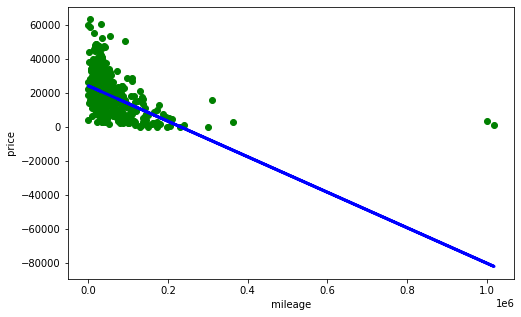

In [25]:

# Your input goes here
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,5))



# label axes 
plt.xlabel(" mileage ") 
plt.ylabel(" price ")

# Scatter plot actual test set values in Black

plt.scatter(x_test["mileage"], y_test, color ='green')

# line plot for predictions 
plt.plot(x_test["mileage"],  y_pred, color = "blue", linewidth = 3)

# plotting the graph


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

X = X.transpose()
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [-0.10427713]
Intercept: 24181.595659986837
Mean squared error (MSE): 132847587.38
Coefficient of determination (R^2): 0.05


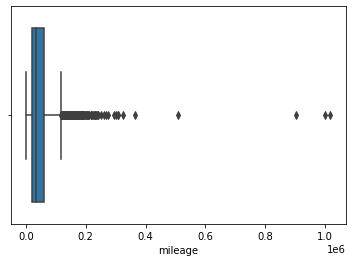

In [27]:
# check outliers
sns.boxplot(x=data_new["mileage"])
plt.show()

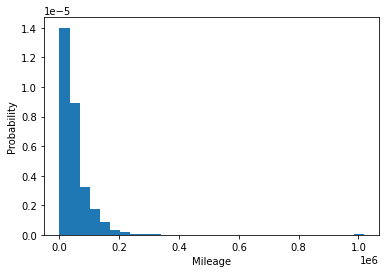

In [28]:
x=data_new["mileage"]
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Mileage');

In [29]:
data_new[["mileage"]].describe()

,mileage
count,2.453000e+03
mean,5.017271e+04
std,5.460970e+04
min,1.000000e+00
25%,2.130400e+04
50%,3.506500e+04
75%,6.015800e+04
max,1.017936e+06


In [30]:
# Will calculate Interquartile Range of the data (IQR = q3 — q1) to drop the outliers
IQR=data_new["mileage"].quantile(0.75)-data_new["mileage"].quantile(0.25)
IQR

38854.0

In [31]:
# acceptable limit for value to concider the data without outliers
# we have outliers only on the upper end
upperLim=data_new["mileage"].quantile(0.75)+1.5*IQR
print(upperLim)

118439.0


In [32]:
df_out = data_new.loc[(data_new["mileage"] > 0) & (data_new["mileage"] < upperLim)]
df_out

,price,brand,model,year,title_status,mileage,color,state,brand category,color category,title_category
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,7,37,0
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,8,4,0
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,5,32,0
5,5700,dodge,mpv,2018,clean vehicle,45561,white,texas,7,44,0
7,13350,gmc,door,2017,clean vehicle,23525,gray,california,9,15,0
...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609,red,california,24,32,0
2495,9200,nissan,versa,2018,clean vehicle,34553,silver,florida,24,37,0
2496,9200,nissan,versa,2018,clean vehicle,31594,silver,florida,24,37,0
2497,9200,nissan,versa,2018,clean vehicle,32557,black,florida,24,2,0


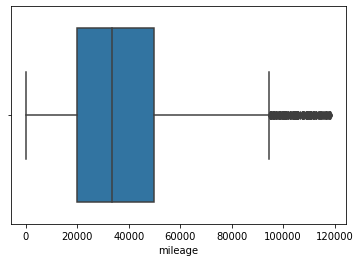

In [33]:
# check outliers
sns.boxplot(x=df_out["mileage"])
plt.show()

In [34]:
X = df_out.drop(["brand","model", "title_status", "color", "state"], axis=1)
Y = df_out['price']

In [35]:
#will use 20% by 80% size for training model
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [36]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train["mileage"].values.reshape(-1,1), y_train)


LinearRegression()

In [37]:
y_pred = model.predict(x_test['mileage'].values.reshape(-1,1))  

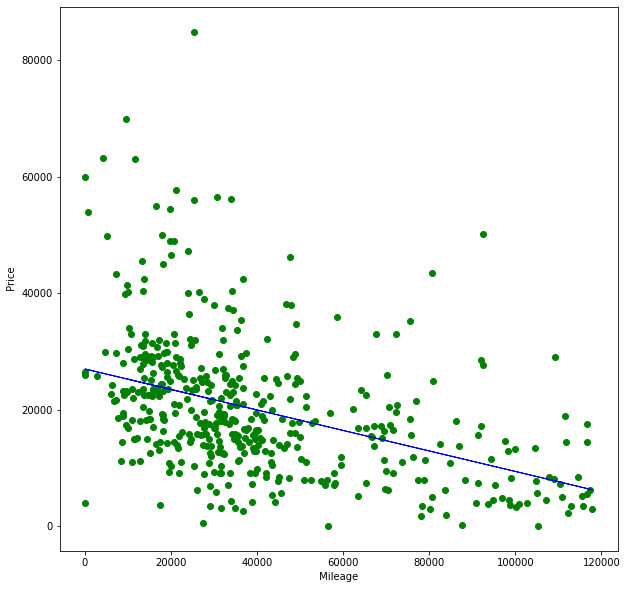

In [38]:

# Your input goes here
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))



# label axes 
plt.xlabel(" Mileage ") 
plt.ylabel(" Price ")

# Scatter plot actual test set values in Black

plt.scatter(x_test["mileage"], y_test, color ='green')

# line plot for predictions 
plt.plot(x_test["mileage"],  y_pred, color = "blue", linewidth = 1)

# plotting the graph


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))
print('Absolute Error: %.2f'
      % metrics.mean_absolute_error(y_test, y_pred))

Coefficients: [-0.17603178]
Intercept: 27011.708846130256
Mean squared error (MSE): 119282109.39
Coefficient of determination (R^2): 0.19
Absolute Error: 7850.57


In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1458,40200,25246.462122
113,34002,21392.246225
1385,54500,23516.949850
1807,4500,9650.574209
1198,28500,10799.181595
...,...,...
2112,4000,11038.584821
1173,15100,19851.792088
860,21500,25823.846372
1230,13700,15191.174591
